In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.preprocessing import LabelEncoder


In [2]:
df = pd.read_excel('train.xlsx')

In [3]:
df.head()

,ID,Insects,Crop,Soil,Category_of_Toxicant,Does_count,Number_of_Weeks_Used,Number_Weeks_does_not used,Season,Crop_status
0,1,188,Feed,clay,1,0,0.0,0,1,0
1,2,209,Feed,clay,1,0,0.0,0,2,1
2,3,257,Feed,clay,1,0,0.0,0,2,1
3,4,257,Feed,silt,1,0,0.0,0,2,1
4,5,342,Feed,clay,1,0,0.0,0,2,1


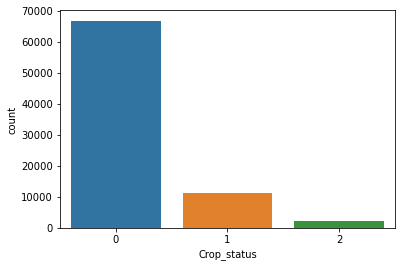

In [4]:
sns.countplot(df['Crop_status'])

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80000 entries, 0 to 79999
Data columns (total 10 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   ID                          80000 non-null  int64  
 1   Insects                     80000 non-null  int64  
 2   Crop                        80000 non-null  object 
 3   Soil                        80000 non-null  object 
 4   Category_of_Toxicant        80000 non-null  int64  
 5   Does_count                  80000 non-null  int64  
 6   Number_of_Weeks_Used        71945 non-null  float64
 7   Number_Weeks_does_not used  80000 non-null  int64  
 8   Season                      80000 non-null  int64  
 9   Crop_status                 80000 non-null  int64  
dtypes: float64(1), int64(7), object(2)
memory usage: 6.1+ MB


In [6]:
df['Number_of_Weeks_Used'].fillna(df.Number_of_Weeks_Used.median(), inplace=True)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80000 entries, 0 to 79999
Data columns (total 10 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   ID                          80000 non-null  int64  
 1   Insects                     80000 non-null  int64  
 2   Crop                        80000 non-null  object 
 3   Soil                        80000 non-null  object 
 4   Category_of_Toxicant        80000 non-null  int64  
 5   Does_count                  80000 non-null  int64  
 6   Number_of_Weeks_Used        80000 non-null  float64
 7   Number_Weeks_does_not used  80000 non-null  int64  
 8   Season                      80000 non-null  int64  
 9   Crop_status                 80000 non-null  int64  
dtypes: float64(1), int64(7), object(2)
memory usage: 6.1+ MB


In [8]:
df2 = pd.get_dummies(df, columns=['Crop', 'Soil'])


In [9]:
df2

,ID,Insects,Category_of_Toxicant,Does_count,Number_of_Weeks_Used,Number_Weeks_does_not used,Season,Crop_status,Crop_Feed,Crop_Food,Soil_clay,Soil_silt
0,1,188,1,0,0.0,0,1,0,1,0,1,0
1,2,209,1,0,0.0,0,2,1,1,0,1,0
2,3,257,1,0,0.0,0,2,1,1,0,1,0
3,4,257,1,0,0.0,0,2,1,1,0,0,1
4,5,342,1,0,0.0,0,2,1,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
79995,79996,209,2,20,12.0,6,2,0,0,1,0,1
79996,79997,232,2,20,12.0,9,1,0,0,1,0,1
79997,79998,256,2,10,14.0,10,1,0,0,1,0,1
79998,79999,256,2,10,16.0,8,2,0,0,1,0,1


In [10]:
ext = df2[df2.Crop_status == 2]


In [11]:
df3 = pd.concat([df2,ext,ext,ext,ext])

In [12]:
df3.Crop_status.value_counts()

0    66716
1    11183
2    10505
Name: Crop_status, dtype: int64

In [13]:
#dounsampling step
from sklearn.utils import resample

# Separating majority and minority classes
df_major = df3[df3.Crop_status==1]
df_minor= df3[df3.Crop_status==2]
 
# Downsample major class
df_majority_downsampled = resample(df_major,replace=False,n_samples=len(df_minor),random_state=42)
 
# Combining minor class with downsampled major class
dff = pd.concat([df_majority_downsampled, df_minor])
 
# Display new class counts
dff.Crop_status.value_counts(normalize = True)
dff.reset_index(inplace = True)
dff.drop(['index'], axis = 1, inplace = True)

#dounsampling step
from sklearn.utils import resample

# Separating majority and minority classes
df_major = df3[df3.Crop_status==0]
df_minor= dff[dff.Crop_status==2]
 
# Downsample major class
df_majority_downsampled = resample(df_major,replace=False,n_samples=len(df_minor),random_state=42)
 
# Combining minor class with downsampled major class
df4 = pd.concat([df_majority_downsampled,dff])
 
# Display new class counts
df4.Crop_status.value_counts(normalize = True)
df4.reset_index(inplace = True)
df4.drop(['index'], axis = 1, inplace = True)

In [14]:
df4

,ID,Insects,Category_of_Toxicant,Does_count,Number_of_Weeks_Used,Number_Weeks_does_not used,Season,Crop_status,Crop_Feed,Crop_Food,Soil_clay,Soil_silt
0,58234,851,2,10,24.0,12,2,0,1,0,1,0
1,39048,851,2,20,33.0,4,1,0,0,1,1,0
2,28915,1296,2,80,45.0,3,2,0,0,1,1,0
3,43924,1297,3,80,43.0,0,2,0,1,0,0,1
4,41224,448,3,20,26.0,0,1,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
31510,79786,1898,2,40,40.0,10,3,2,0,1,1,0
31511,79787,1898,2,40,37.0,12,2,2,0,1,1,0
31512,79865,2267,2,10,26.0,29,1,2,0,1,1,0
31513,79866,2267,2,40,38.0,10,1,2,0,1,1,0


In [15]:
df4.Crop_status.value_counts(normalize = True)

2    0.333333
1    0.333333
0    0.333333
Name: Crop_status, dtype: float64

In [16]:
df4.Crop_status.value_counts()

2    10505
1    10505
0    10505
Name: Crop_status, dtype: int64

In [17]:
from sklearn.metrics import confusion_matrix 
from sklearn.model_selection import train_test_split 

In [18]:
X= df4.drop(['ID','Crop_status'],axis = 1)

In [19]:
y = df4['Crop_status']

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 0) 

In [ ]:
st= StandardScaler()
X_train = st.fit_transform(X_train)
X_test  = st.transform(X_test)

In [76]:
from sklearn.tree import DecisionTreeClassifier 
dtree_model = DecisionTreeClassifier(max_depth = 2).fit(X_train, y_train) 
dtree_predictions = dtree_model.predict(X_test) 

In [77]:
cm = confusion_matrix(y_test, dtree_predictions)

In [78]:
accuracy = dtree_model.score(X_test, y_test)
accuracy

0.5076786394212464

In [ ]:
from sklearn.svm import SVC 
svm_model_linear = SVC(kernel = 'linear', C = 1).fit(X_train, y_train) 
svm_predictions = svm_model_linear.predict(X_test) 
accuracy = svm_model_linear.score(X_test, y_test) 


In [22]:
# training a KNN classifier 
from sklearn.neighbors import KNeighborsClassifier 
knn = KNeighborsClassifier(n_neighbors = 7).fit(X_train, y_train) 
accuracy = knn.score(X_test, y_test) 
accuracy

0.5573042264246731

In [24]:
cm = confusion_matrix(y_test, knn.predict(X_test) )
cm

array([[1399,  627,  541],
       [ 657, 1010,  983],
       [ 221,  459, 1982]], dtype=int64)

In [26]:
test_df=pd.read_excel('test.xlsx')

In [27]:
test_df.head()

,ID,Insects,Crop,Soil,Category_of_Toxicant,Does_count,Number_of_Weeks_Used,Number_Weeks_does_not used,Season
0,1,188,Feed,silt,1,0,NaN,0,2
1,2,410,Feed,silt,1,0,0.0,0,2
2,3,626,Feed,clay,1,0,0.0,0,2
3,4,731,Feed,clay,1,0,0.0,0,2
4,5,789,Food,clay,1,0,0.0,0,1


In [28]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35000 entries, 0 to 34999
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   ID                          35000 non-null  int64  
 1   Insects                     35000 non-null  int64  
 2   Crop                        35000 non-null  object 
 3   Soil                        35000 non-null  object 
 4   Category_of_Toxicant        35000 non-null  int64  
 5   Does_count                  35000 non-null  int64  
 6   Number_of_Weeks_Used        31458 non-null  float64
 7   Number_Weeks_does_not used  35000 non-null  int64  
 8   Season                      35000 non-null  int64  
dtypes: float64(1), int64(6), object(2)
memory usage: 2.4+ MB


In [29]:
test_df['Number_of_Weeks_Used'].fillna(test_df.Number_of_Weeks_Used.median(), inplace=True)

In [30]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35000 entries, 0 to 34999
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   ID                          35000 non-null  int64  
 1   Insects                     35000 non-null  int64  
 2   Crop                        35000 non-null  object 
 3   Soil                        35000 non-null  object 
 4   Category_of_Toxicant        35000 non-null  int64  
 5   Does_count                  35000 non-null  int64  
 6   Number_of_Weeks_Used        35000 non-null  float64
 7   Number_Weeks_does_not used  35000 non-null  int64  
 8   Season                      35000 non-null  int64  
dtypes: float64(1), int64(6), object(2)
memory usage: 2.4+ MB


In [31]:
test_df2 = pd.get_dummies(test_df, columns=['Crop', 'Soil'])


In [32]:
test_df2

,ID,Insects,Category_of_Toxicant,Does_count,Number_of_Weeks_Used,Number_Weeks_does_not used,Season,Crop_Feed,Crop_Food,Soil_clay,Soil_silt
0,1,188,1,0,28.0,0,2,1,0,0,1
1,2,410,1,0,0.0,0,2,1,0,0,1
2,3,626,1,0,0.0,0,2,1,0,1,0
3,4,731,1,0,0.0,0,2,1,0,1,0
4,5,789,1,0,0.0,0,1,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...
34995,34996,677,2,40,27.0,3,1,0,1,0,1
34996,34997,731,2,10,8.0,20,3,0,1,0,1
34997,34998,732,2,10,10.0,20,2,0,1,0,1
34998,34999,731,2,10,31.0,2,2,0,1,0,1


In [33]:
test_X = test_df2.drop(['ID'],axis = 1)

In [34]:
test_X.columns

Index(['Insects', 'Category_of_Toxicant', 'Does_count', 'Number_of_Weeks_Used',
       'Number_Weeks_does_not used', 'Season', 'Crop_Feed', 'Crop_Food',
       'Soil_clay', 'Soil_silt'],
      dtype='object')

In [35]:
X.columns

Index(['Insects', 'Category_of_Toxicant', 'Does_count', 'Number_of_Weeks_Used',
       'Number_Weeks_does_not used', 'Season', 'Crop_Feed', 'Crop_Food',
       'Soil_clay', 'Soil_silt'],
      dtype='object')

In [36]:
# training a KNN classifier 
from sklearn.neighbors import KNeighborsClassifier 
knn = KNeighborsClassifier(n_neighbors = 7).fit(X, y)
predictions = knn.predict(test_X)

In [39]:
pred = pd.Series(predictions)

In [40]:
pred.value_counts()

0    17075
1     9191
2     8734
dtype: int64

In [41]:
pred.to_csv('Attempt1(KNN).csv')